<a href="https://colab.research.google.com/github/bori00/BrainTumorClassification/blob/bori_dev/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Classification

## Introduction

Just a few things that I found and may help you:

Summary:

**Glioma tumors**

*   cause: glial cells grow out of control due to DNA changes
*   type: **malignant** (cancerous)
*   location: depends on the subtype.
*   treatment: possible, but difficult (hard to reach with surgery, may grow into other areas of the brain). Requires a combination of surgery, radiation therapy and chemotherapy
*   frequency: ~25% of all detected brain tumors are gliomas
*   diagnosis: first, an MRI or CT scan is made. If an abnormal mass is found, a biopsy is made. 
*   treatment: the primary treatment is surgery, which is usually followed by chemotherapy and radiation therapy.
*  [source](https://my.clevelandclinic.org/health/diseases/21969-glioma#:~:text=A%20glioma%20is%20a%20tumor%20that%20forms%20when%20glial%20cells,can%20be%20very%20slow%20growing.)

**Meningioma tumors**

*  cause: 40-80% of all meningiomas have an abnormality in chromosome 22, which is partially responsible for surpressing the growth of tumors. Also, a correlation between hormones and meningiomas were found.
*   type: 
  *   grade I: **bening**, and grows slowly
  *   grade II: atypical, grows more quickly
  *   grade III: **malignant**, grows and spreads quickly
*  location: generally found on the outer surface the brain. The source is the menigers, the layers of tissue that cover the brain and spinal cord
*  frequency: represent ~33% of all brain tumors
*  diagnosis: the first step involves an MRI or a CT scan, and it is sometimes enough for a full diagnosis. Otherwise, a biopsy may be needed.
*  treatment: usually by radiosurgery and surgery. Chemotherapy is only applied for malignant tumors.
*  [source](https://my.clevelandclinic.org/health/diseases/17858-meningioma)


**Pituitary tumors**


*   cause: accidental changes in the DNA
*   type: mostly **bening**, and they do not spread in other parts of the body. 
*   location: in the pituitary gland (found behind the nose and the sphenoid sinus). May cause a hormone deficiency.
*   diagnosis: an MRI or CT scan is usually enough, together with a medical background check
*   frequency: doctors found that almost 25% of the populations had a pituitary adenoma, but most of them are never detected. Approximately 12.5% of all brain tumors are pituitary tumors.
*   treatment: usually, immediate treatment is not required. The tumor may be removed, the growth may be controlled or the hormone levels may be managed with medications. 
*   [source1](https://my.clevelandclinic.org/health/diseases/15328-pituitary-adenomas-), [source2](https://www.mayoclinic.org/diseases-conditions/pituitary-tumors/symptoms-causes/syc-20350548#:~:text=A%20pituitary%20tumor%20is%20a,develop%20in%20your%20pituitary%20gland) 

## Setup

In [1]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import gridspec
import seaborn as sns

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, precision_score, balanced_accuracy_score

import urllib
from urllib import request

import time

from numpy.random import seed

from yellowbrick.classifier import ClassPredictionError

In [2]:
pip install -U matplotlib

In [3]:
# Reproducability
SEED = 31415
def set_seed(seed_value=SEED):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    seed(seed_value)
set_seed()

## Import Dataset

In [4]:
# mount google drive on the virtual machine created by colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# unzip the files containing the training and testing images
# important: this step assumes that you have the two zip files in 'BrainTumorClassification/Training.zip' and 'BrainTumorClassification/Testing.zip' in your Google Drive
!unzip gdrive/My\ Drive/BrainTumorClassification/Training.zip
!unzip gdrive/My\ Drive/BrainTumorClassification/Testing.zip

Archive:  gdrive/My Drive/BrainTumorClassification/Training.zip
   creating: Training/glioma_tumor/
  inflating: Training/glioma_tumor/gg (1).jpg  
  inflating: Training/glioma_tumor/gg (10).jpg  
  inflating: Training/glioma_tumor/gg (100).jpg  
  inflating: Training/glioma_tumor/gg (101).jpg  
  inflating: Training/glioma_tumor/gg (102).jpg  
  inflating: Training/glioma_tumor/gg (103).jpg  
  inflating: Training/glioma_tumor/gg (104).jpg  
  inflating: Training/glioma_tumor/gg (105).jpg  
  inflating: Training/glioma_tumor/gg (106).jpg  
  inflating: Training/glioma_tumor/gg (107).jpg  
  inflating: Training/glioma_tumor/gg (108).jpg  
  inflating: Training/glioma_tumor/gg (109).jpg  
  inflating: Training/glioma_tumor/gg (11).jpg  
  inflating: Training/glioma_tumor/gg (110).jpg  
  inflating: Training/glioma_tumor/gg (111).jpg  
  inflating: Training/glioma_tumor/gg (112).jpg  
  inflating: Training/glioma_tumor/gg (113).jpg  
  inflating: Training/glioma_tumor/gg (114).jpg  
  in

## Create Dataframes

Not all images ae of the same size, but 5012x512 is close to their original size.

In [6]:
IMAGE_SIZE = (512, 512)
BATCH_SIZE = 32

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'Training',
  shuffle=True,
  validation_split=0.2,
  subset="training",
  color_mode="grayscale",
  seed=SEED,
  image_size=IMAGE_SIZE, 
  batch_size=BATCH_SIZE)

valid_ds = tf.keras.utils.image_dataset_from_directory(
  'Training',
  shuffle=True,
  validation_split=0.2,
  subset="validation",
  color_mode="grayscale",
  seed=SEED,
  image_size=IMAGE_SIZE, 
  batch_size=BATCH_SIZE)

test_ds = tf.keras.utils.image_dataset_from_directory(
  'Testing',
  shuffle=True,
  seed=SEED,
  color_mode="grayscale",
  image_size=IMAGE_SIZE, 
  batch_size=BATCH_SIZE)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.


In [8]:
for x, y in train_ds.take(1):
  print("Shape of one batch in the   training dataset: ", x.shape, " with labels:", y)

for x, y in valid_ds.take(1):
  print("Shape of one batch in the validation dataset: ", x.shape, " with labels:", y)

for x, y in test_ds.take(1):
  print("Shape of one batch in the    testing dataset: ", x.shape, " with labels:", y)

Shape of one batch in the   training dataset:  (32, 512, 512, 1)  with labels: tf.Tensor([3 1 1 2 1 0 1 1 3 0 1 2 1 3 3 3 0 2 3 3 3 1 2 2 3 1 3 0 1 3 3 0], shape=(32,), dtype=int32)
Shape of one batch in the validation dataset:  (32, 512, 512, 1)  with labels: tf.Tensor([3 1 0 1 3 3 1 0 2 1 2 0 2 1 0 1 0 3 3 0 3 2 1 0 1 1 0 2 3 3 0 3], shape=(32,), dtype=int32)
Shape of one batch in the    testing dataset:  (32, 512, 512, 1)  with labels: tf.Tensor([3 3 1 0 2 0 2 2 3 1 2 1 2 0 2 1 2 1 2 0 2 0 1 0 1 1 2 3 1 1 2 3], shape=(32,), dtype=int32)


In [9]:
class_names = train_ds.class_names
print("Class Names: ", class_names)

Class Names:  ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


### Distributions

In [10]:
def get_distribution(ds):
  vals = np.unique(np.fromiter(ds.unbatch().map(lambda x, y: y), float), return_counts=True)
  dist = [0, 0, 0, 0]

  for val, count in zip(*vals):
    dist[int(val)] = count
  
  return dist

In [11]:
training_dist = get_distribution(train_ds)
valid_dist = get_distribution(valid_ds)
testing_dist = get_distribution(test_ds)

In [12]:
plt.figure(figsize=(20, 8))
plt.suptitle("Tumor Class Distributions", fontsize = 32)

plt.subplot(1, 3, 1)
plt.title("Training Dataset", fontsize = 24)
plt.bar(range(len(training_dist)), training_dist, tick_label=class_names)

plt.subplot(1, 3, 2)
plt.title("Validation Dataset", fontsize = 24)
plt.bar(range(len(valid_dist)), valid_dist, tick_label=class_names)

plt.subplot(1, 3, 3)
plt.title("Testing Dataset", fontsize = 24)
plt.bar(range(len(testing_dist)), testing_dist, tick_label=class_names)

plt.show()

The training and validation dataset are well-balanced, as they were programatically generated, but the test dataset, downloaded from kaggle, has a significantly different class distribution from that of the other datasets: the no_tumor class is overrepresented in the test dataset compared to the other two.

## Visualize data

In [13]:
def categorize_images(batch):
  cardinalities = [0, 0, 0, 0]
  cat_images = [[], [], [], []]

  for images, labels in batch:
    for i in range(images.shape[0]):
        category = int(labels[i])
        cardinalities[category] = cardinalities[category] + 1
        cat_images[category].append(images[i].numpy().astype("uint8"))
  
  return cat_images, cardinalities

In [14]:
def visualize_batch_per_categories(batch):
  cat_images, cardinalities = categorize_images(batch)

  no_columns = max(cardinalities)

  # create 4x1 subplots
  fig, axs = plt.subplots(nrows=4, ncols=1, constrained_layout=True)
  fig.set_figheight(20)
  fig.set_figwidth(4 * no_columns)
  fig.suptitle('The content of one Batch', fontsize = 64)

  # clear subplots
  for ax in axs:
      ax.remove()

  # add subfigure per subplot
  gridspec = axs[0].get_subplotspec().get_gridspec()
  subfigs = [fig.add_subfigure(gs) for gs in gridspec]

  for row, subfig in enumerate(subfigs):
      subfig.suptitle(class_names[row], fontsize = 32)

      # create 1x3 subplots per subfig
      axs = subfig.subplots(nrows=1, ncols=no_columns)
      for col, ax in enumerate(axs):
          if (cardinalities[row] > col):
            ax.plot()
            ax.grid(False)
            ax.imshow(cat_images[row][col-1], cmap="gray")

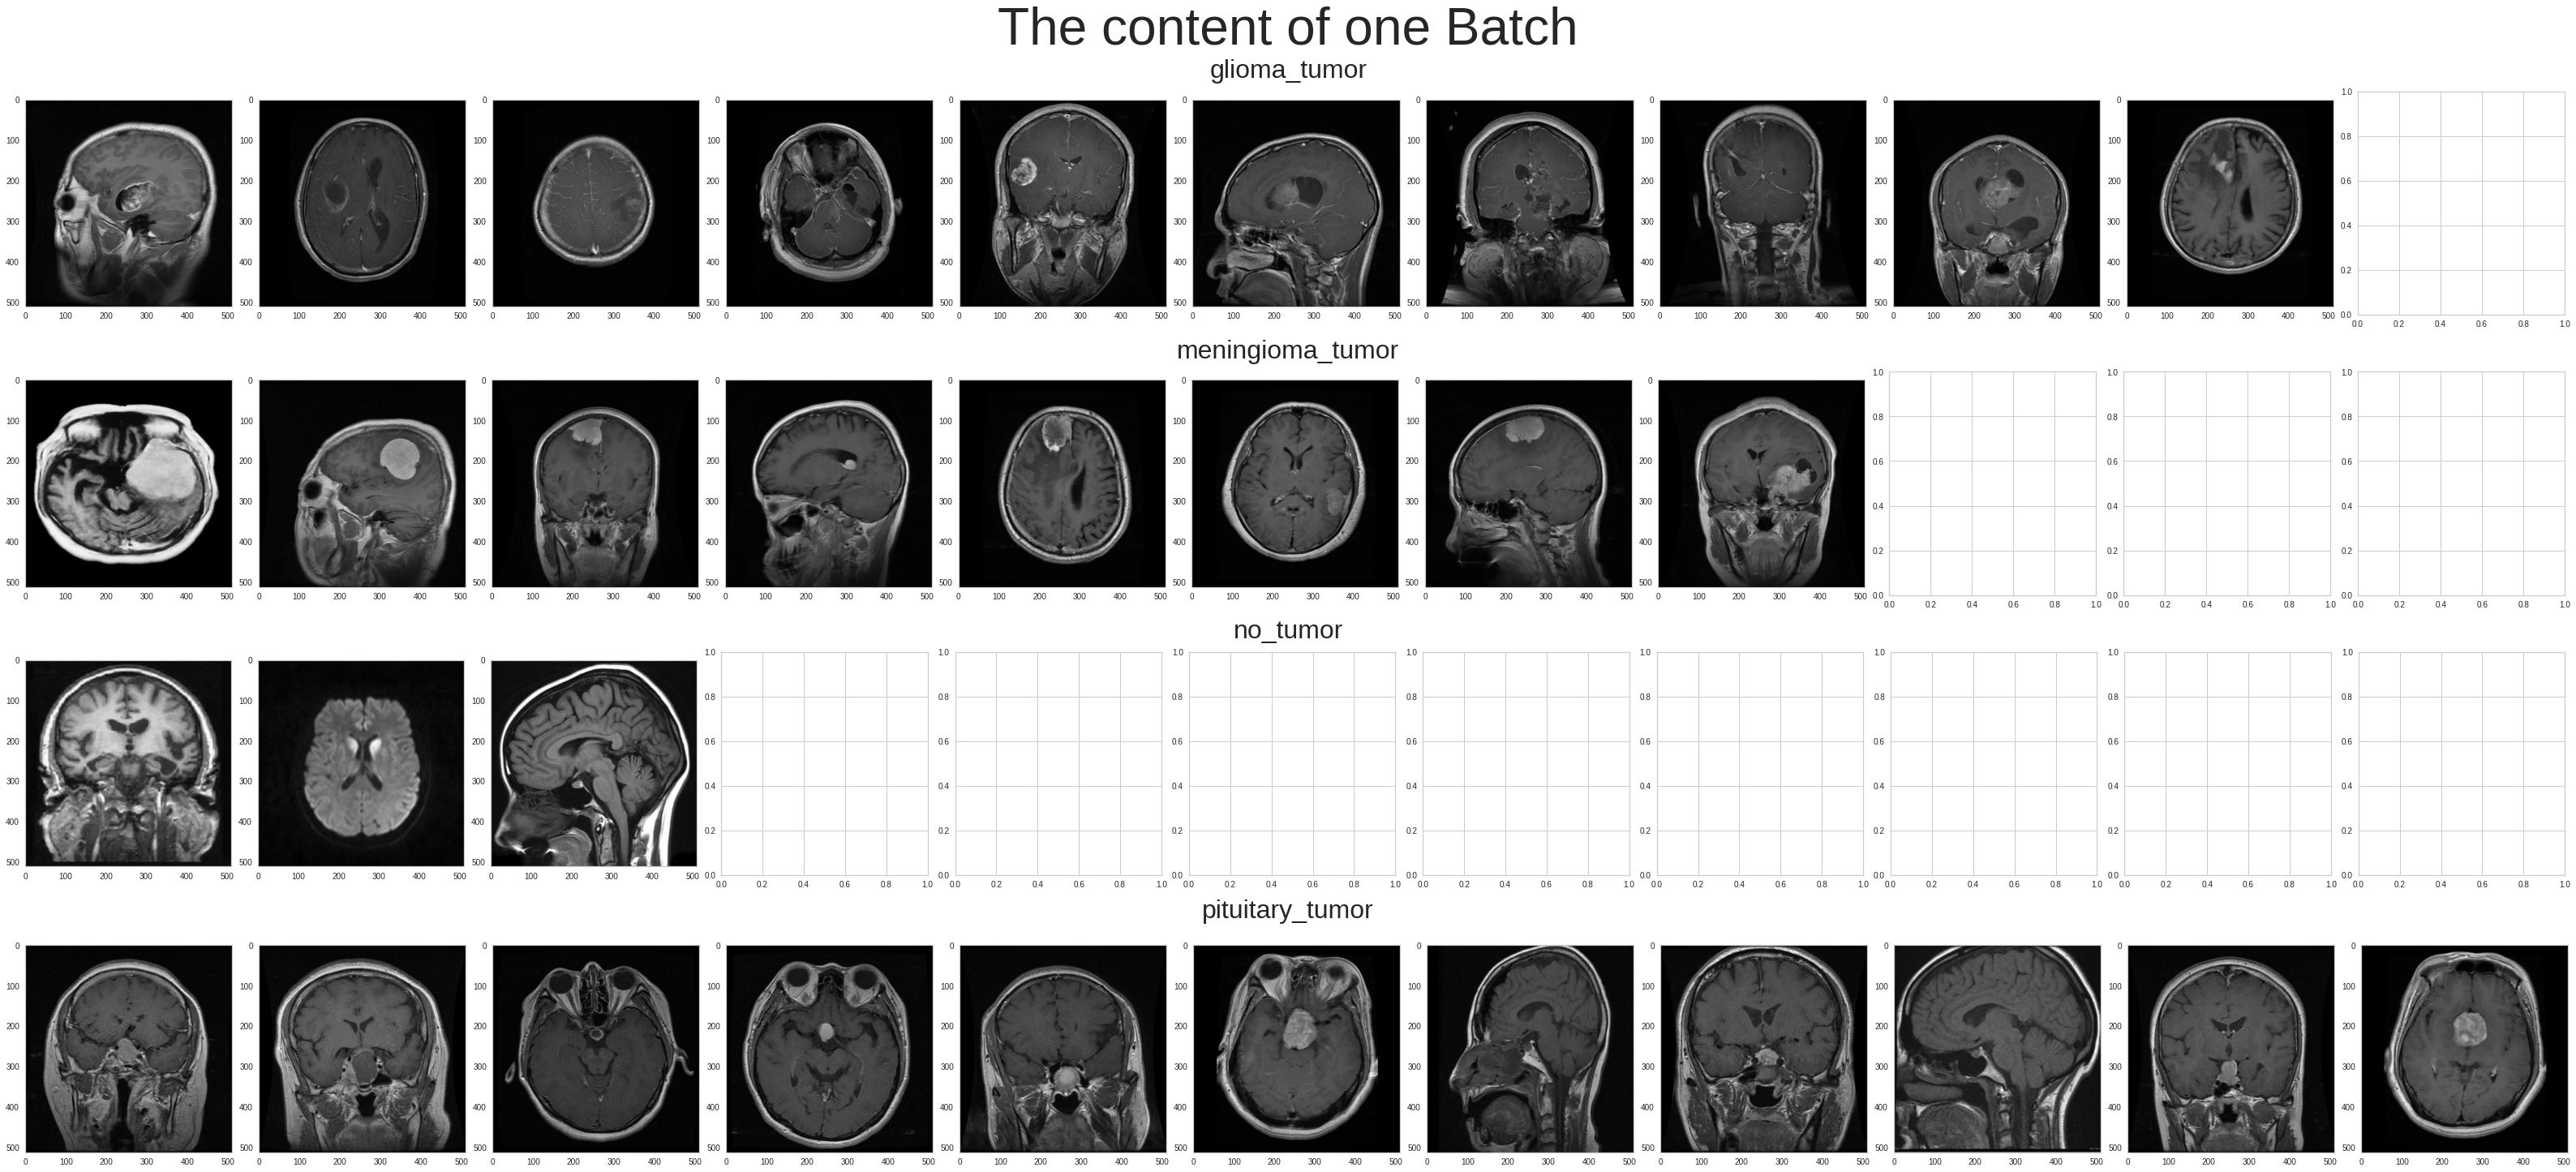

In [15]:
visualize_batch_per_categories(train_ds.take(1))

## Performance configurations

Source: [tensorflow tutorial](https://www.tensorflow.org/tutorials/images/classification)

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Preprocessing

Let's find the range of the color intensities:

In [17]:
def get_sample_image_values_range(ds):
  image_batch, labels_batch = next(iter(ds))
  first_image = image_batch[0]
  # Notice the pixel values are now in `[0,1]`.
  return np.min(first_image), np.max(first_image)

In [18]:
print("Sample image's values' range: ", get_sample_image_values_range(train_ds))

Sample image's values' range:  (0.0, 255.0)


Because neural networks work better with small values, we should scale the [0, 255] pixel color values to [0, 1]. 

In [19]:
def rescale_pixels(ds):
  rescaler = tf.keras.layers.Rescaling(1./255.0)
  return ds.map(lambda x, y: (rescaler(x), y))

In [20]:
train_ds = rescale_pixels(train_ds)
valid_ds = rescale_pixels(valid_ds)
test_ds = rescale_pixels(test_ds)

## Evaluation metrics

Before starting to design and train a machine learning model for classifying MRI images, we should think about what the goal of this classifier is, what is the metric that we want to maximize.

We have shown above, that in most cases, when an MRI suggests that a patient might have a brain tumor, then a biopsy is made to get more information about the tumor's type (bening or malignant), grade (aggressiveness), etc. This is especially true when the chance of a ,alignant tumor is higher, but for pituitary tumors an MRI may sometimes be enough for a full diagnosis, together with a medical background check.

This suggests that **detecting that a paient has a tumor is of a higher importance than classifying the tumor**: fortunately, a brain biopsy, though invasive, is considered a very safe procedure nowadays, so the cost of sending a patient to an unnecessary biopsy is far less then not detecting a tumor and letting it grow and possibly spread over time, as tumors are generally far easier to treat in the early stages. Thus, first of all, **we should maximize the precision for the *no_tumor* class**: we want that all MRIs categorized as no_tumor actually belong to patients who have no tumor, and no patient is mistakenly said they they're healthy if this is not the case.

**However, misclassifications among the 3 tumor classes still matter**: it is of utter importance to know as soon as possible whether a tumor is bening (usually the pituitary tumors, sometimes even meningiomas) or malignant (usually the gliomas, sometimes meningiomas). People with a malignant tumor need urgent treatment before the tumor starts to grow and spread, whereas for bening tumors a "wait and see" strategy is often the best choice. Thus, **we should try to maximize the weighted, balanced accuracy = the average recall obtained on each class**. Note that we use a weighted accuracy instead of a simple one in order to overcome the issue of having a slightly imbalanced dataset.

To combine the two metrics outlined above, we'll simply take their average.


In [21]:
no_tumor_precision_weight = 0.5

def get_custom_model_score(y_true, y_pred):
  p1 = precision_score(y_true, y_pred, labels = [2], average = None)[0]
  p2 = balanced_accuracy_score(y_true, y_pred)
  return p1 * no_tumor_precision_weight + p2 * (1 - no_tumor_precision_weight)

## Creating a model

### Helper functions

In [22]:
def plot_loss_accuracy_history(history):
  plt.figure(figsize=(16, 8))

  plt.subplot(1, 2, 1)
  plt.plot(pd.DataFrame(history.history['accuracy']))
  plt.plot(pd.DataFrame(history.history['val_accuracy']))
  plt.grid(True)
  plt.title("Accuracy")
  plt.gca().legend(('training accuracy', 'validation accuracy'))

  plt.subplot(1, 2, 2)
  plt.plot(pd.DataFrame(history.history['loss']))
  plt.plot(pd.DataFrame(history.history['val_loss']))
  plt.grid(True)
  plt.title("Loss")
  plt.gca().legend(('training loss', 'validation loss'))
  plt.show()

In [23]:
def get_images_labels_from_ds(ds):
  images = np.concatenate([x for x, y in valid_ds], axis=0)
  labels = np.concatenate([y for x, y in valid_ds], axis=0)
  return images, labels

In [24]:
def get_label_predictions(images, model, softmax=False):
  pred_raw = model.predict(images)
  if (softmax):
    pred_prob = pred_raw
  else:
    pred_prob = tf.nn.softmax(pred_raw)
  pred_class = [np.int64(np.argmax(prob)) for prob in pred_prob]
  return pred_class

In [25]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
  conf_mat = confusion_matrix(y_true, y_pred)
  cm_df = pd.DataFrame(conf_mat,
                     index = class_names, 
                     columns = class_names)
  plt.figure(figsize=(8,6))
  g = sns.heatmap(cm_df, annot=True, fmt='.4g')
  plt.title(title, fontsize=18)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  # g.set_yticklabels(g.get_yticklabels(), rotation = 30, fontsize = 12)
  g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12)
  plt.show()

In [26]:
def print_classification_metrics(y_true, y_pred):
  print(classification_report(y_true, y_pred, target_names=class_names))

In [27]:
def show_full_classification_report(model, ds, model_name, softmax=False):
  x_images, y_true = get_images_labels_from_ds(ds)
  y_pred = get_label_predictions(x_images, model, softmax=softmax)
  plot_confusion_matrix(y_true, y_pred, "Confusion matrix for the " + model_name)
  print_classification_metrics(y_true, y_pred)
  print("---- FINAL SCORE (CUSTOM FORMULA) ", get_custom_model_score(y_true, y_pred))

In [28]:
num_classes = len(class_names)

In [29]:
valid_images, valid_labels = get_images_labels_from_ds(valid_ds)

### Initial Model

We'll start with a very simple initial model, consisting of only one convolutional and one dense layer. This model is not expeccted to produce good results, but we consider it rather an experiment.

In [ ]:
model1 = Sequential([
  # layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[0], 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 32)                33554464  
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 33,554,756
Trainable params: 33,554,756
Non-trainable params: 0
____________________________________________

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)
mc = ModelCheckpoint('initial_model.h5', monitor='val_accuracy', mode='max')

set_seed()

max_epochs=30
history1 = model1.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=max_epochs,
  callbacks=[es, mc]
)

Epoch 1/30
72/72 [==============================] - 29s 206ms/step - loss: 3.6274 - accuracy: 0.5196 - val_loss: 0.9449 - val_accuracy: 0.6498
Epoch 2/30
72/72 [==============================] - 14s 196ms/step - loss: 0.6633 - accuracy: 0.7626 - val_loss: 0.7159 - val_accuracy: 0.7387
Epoch 3/30
72/72 [==============================] - 14s 198ms/step - loss: 0.3589 - accuracy: 0.8924 - val_loss: 0.6395 - val_accuracy: 0.7718
Epoch 4/30
72/72 [==============================] - 14s 198ms/step - loss: 0.2060 - accuracy: 0.9395 - val_loss: 0.5580 - val_accuracy: 0.8049
Epoch 5/30
72/72 [==============================] - 14s 198ms/step - loss: 0.0931 - accuracy: 0.9804 - val_loss: 0.5090 - val_accuracy: 0.8275
Epoch 6/30
72/72 [==============================] - 14s 199ms/step - loss: 0.0449 - accuracy: 0.9952 - val_loss: 0.5355 - val_accuracy: 0.8153
Epoch 7/30
72/72 [==============================] - 14s 200ms/step - loss: 0.0277 - accuracy: 0.9978 - val_loss: 0.5340 - val_accuracy: 0.8240

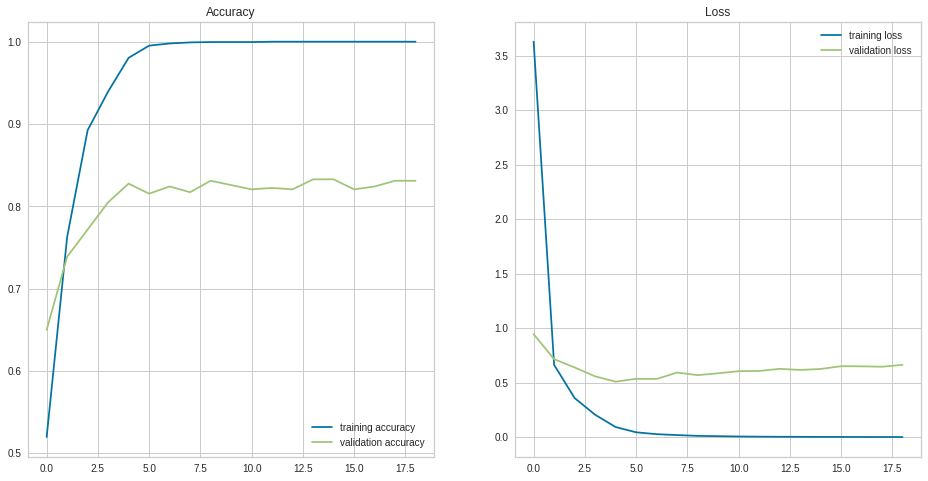

In [ ]:
plot_loss_accuracy_history(history1)

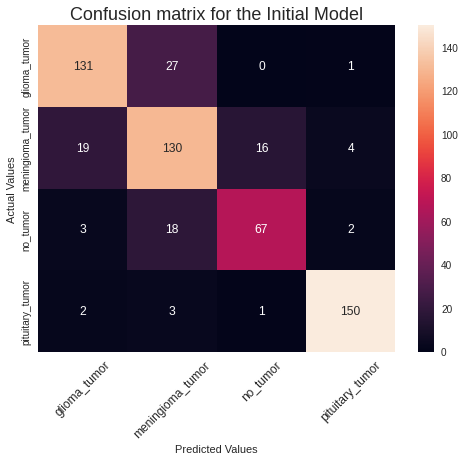

                  precision    recall  f1-score   support

    glioma_tumor       0.85      0.82      0.83       159
meningioma_tumor       0.73      0.77      0.75       169
        no_tumor       0.80      0.74      0.77        90
 pituitary_tumor       0.96      0.96      0.96       156

        accuracy                           0.83       574
       macro avg       0.83      0.82      0.83       574
    weighted avg       0.83      0.83      0.83       574

---- FINAL SCORE (CUSTOM FORMULA)  0.811198654594881


In [ ]:
show_full_classification_report(model1, valid_ds, "Initial Model")

Overall, this ultra-simple model performed surprisingly well: reaching a 0.83 accuracy and falsely labelling a patient as healthy in only 20% of the cases is a result that an untrained human eye probably could not reproduce.

We may ask ourselved the question, how one single convolutional layer could detect such a complex pattern, as a tumor in the brain. The key to the answer lies in the fact that **this model is not that simple actually**, as it has an enormous amount of trainable parameters (33 million). This many parameters are apparently more than enough to perfectly decsribe the training dataset. 

However, there is a huge gap (almost 20%) between the training and the validation accuracy, which suggests that the model has in fact overfitted the training dataset, but does not generalize well. Indeed, 33 million parameters are enough to learn any images, but they are in themselves not enough to extract general characteristics of the classes.

### Deeper Model 1 (model2)

As a next step, we'll build a deeper model with 3 convolutional and 2 dense layers. The 3 convolutional layers are already capable of recognizing patterns of 7*7 size, which allwos us to expect a significantly better result than with the previous network.

In [ ]:
model2 = Sequential([
  # layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[0], 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 512, 512, 16)      160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 256, 256, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)      

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True,)
mc = ModelCheckpoint('deeper_model1.h5', monitor='val_accuracy', mode='max')

set_seed()

max_epochs=30
history2 = model2.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=max_epochs,
  callbacks=[es, mc]
)

Epoch 1/30
72/72 [==============================] - 25s 318ms/step - loss: 0.9702 - accuracy: 0.5775 - val_loss: 0.7097 - val_accuracy: 0.6794
Epoch 2/30
72/72 [==============================] - 21s 290ms/step - loss: 0.5353 - accuracy: 0.7766 - val_loss: 0.5493 - val_accuracy: 0.7631
Epoch 3/30
72/72 [==============================] - 21s 292ms/step - loss: 0.2991 - accuracy: 0.8754 - val_loss: 0.4808 - val_accuracy: 0.8188
Epoch 4/30
72/72 [==============================] - 21s 292ms/step - loss: 0.1526 - accuracy: 0.9460 - val_loss: 0.4799 - val_accuracy: 0.8606
Epoch 5/30
72/72 [==============================] - 21s 288ms/step - loss: 0.1284 - accuracy: 0.9560 - val_loss: 0.5837 - val_accuracy: 0.8310
Epoch 6/30
72/72 [==============================] - 21s 285ms/step - loss: 0.0574 - accuracy: 0.9804 - val_loss: 0.7455 - val_accuracy: 0.8136
Epoch 7/30
72/72 [==============================] - 21s 287ms/step - loss: 0.0392 - accuracy: 0.9900 - val_loss: 0.7747 - val_accuracy: 0.8293

In [ ]:
plot_loss_accuracy_history(history2)

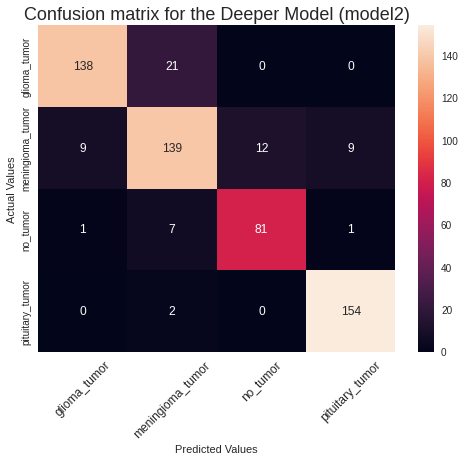

                  precision    recall  f1-score   support

    glioma_tumor       0.93      0.87      0.90       159
meningioma_tumor       0.82      0.82      0.82       169
        no_tumor       0.87      0.90      0.89        90
 pituitary_tumor       0.94      0.99      0.96       156

        accuracy                           0.89       574
       macro avg       0.89      0.89      0.89       574
    weighted avg       0.89      0.89      0.89       574

---- FINAL SCORE (CUSTOM FORMULA)  0.8826825237904876


In [ ]:
show_full_classification_report(model2, valid_ds, "Deeper Model (model2)")

Indeed, we managed to improve the final score by 7%: both the no_tumor precision and the balanced accuracy were improved significantly. This proves that the new model generalized better.

However, note that the training accuracy still reached 100%, suggesting that the model learns too well the training dataset and fails to capture relevant, generic patterns. 

As deepening the model seems a good approach to address this issue, let's build an even deeper model and see how it behaves.

### Deeper Model 2 (model3)

In [ ]:
model3 = Sequential([
  # layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[0], 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 512, 512, 16)      160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 256, 256, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)      

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True,)
mc = ModelCheckpoint('deeper_model2.h5', monitor='val_accuracy', mode='max')

set_seed()

max_epochs=30
history3 = model3.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=max_epochs,
  callbacks=[es, mc]
)

Epoch 1/30
72/72 [==============================] - 34s 444ms/step - loss: 1.0570 - accuracy: 0.5166 - val_loss: 0.8112 - val_accuracy: 0.6272
Epoch 2/30
72/72 [==============================] - 30s 418ms/step - loss: 0.6757 - accuracy: 0.7021 - val_loss: 0.6105 - val_accuracy: 0.7404
Epoch 3/30
72/72 [==============================] - 30s 420ms/step - loss: 0.4622 - accuracy: 0.8105 - val_loss: 0.5421 - val_accuracy: 0.7927
Epoch 4/30
72/72 [==============================] - 30s 422ms/step - loss: 0.3333 - accuracy: 0.8680 - val_loss: 0.4216 - val_accuracy: 0.8362
Epoch 5/30
72/72 [==============================] - 30s 419ms/step - loss: 0.2340 - accuracy: 0.9085 - val_loss: 0.5364 - val_accuracy: 0.8206
Epoch 6/30
72/72 [==============================] - 30s 421ms/step - loss: 0.1901 - accuracy: 0.9247 - val_loss: 0.7157 - val_accuracy: 0.8345
Epoch 7/30
72/72 [==============================] - 30s 422ms/step - loss: 0.1380 - accuracy: 0.9556 - val_loss: 0.4994 - val_accuracy: 0.8693

In [ ]:
plot_loss_accuracy_history(history3)

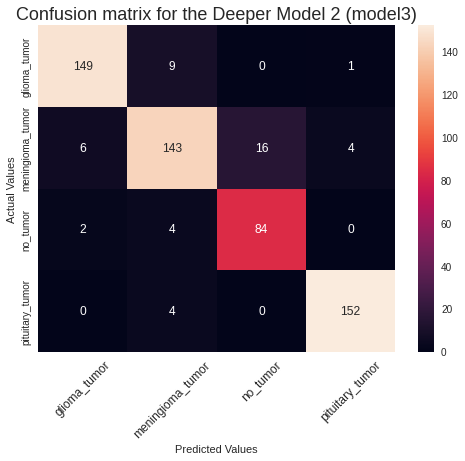

                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.94      0.94       159
meningioma_tumor       0.89      0.85      0.87       169
        no_tumor       0.84      0.93      0.88        90
 pituitary_tumor       0.97      0.97      0.97       156

        accuracy                           0.92       574
       macro avg       0.91      0.92      0.92       574
    weighted avg       0.92      0.92      0.92       574

---- FINAL SCORE (CUSTOM FORMULA)  0.8813691340106435


In [ ]:
show_full_classification_report(model3, valid_ds, "Deeper Model 2 (model3)")

### Model Regularized with Drouput (model4)

In [ ]:
model4 = Sequential([
  # layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[0], 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 512, 512, 16)      160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 256, 256, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 64)      

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True,)
mc = ModelCheckpoint('regularized_model_drouput.h5', monitor='val_accuracy', mode='max')

set_seed()

max_epochs=30
history4 = model4.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=max_epochs,
  callbacks=[es, mc]
)

Epoch 1/30
72/72 [==============================] - 32s 431ms/step - loss: 1.1212 - accuracy: 0.5044 - val_loss: 0.9231 - val_accuracy: 0.5889
Epoch 2/30
72/72 [==============================] - 30s 419ms/step - loss: 0.7529 - accuracy: 0.6908 - val_loss: 0.6926 - val_accuracy: 0.6934
Epoch 3/30
72/72 [==============================] - 30s 421ms/step - loss: 0.5713 - accuracy: 0.7713 - val_loss: 0.6926 - val_accuracy: 0.7003
Epoch 4/30
72/72 [==============================] - 30s 420ms/step - loss: 0.4439 - accuracy: 0.8245 - val_loss: 0.5385 - val_accuracy: 0.7840
Epoch 5/30
72/72 [==============================] - 30s 420ms/step - loss: 0.3637 - accuracy: 0.8563 - val_loss: 0.4680 - val_accuracy: 0.8310
Epoch 6/30
72/72 [==============================] - 30s 419ms/step - loss: 0.2748 - accuracy: 0.8963 - val_loss: 0.4730 - val_accuracy: 0.8258
Epoch 7/30
72/72 [==============================] - 30s 419ms/step - loss: 0.2275 - accuracy: 0.9125 - val_loss: 0.4636 - val_accuracy: 0.8432

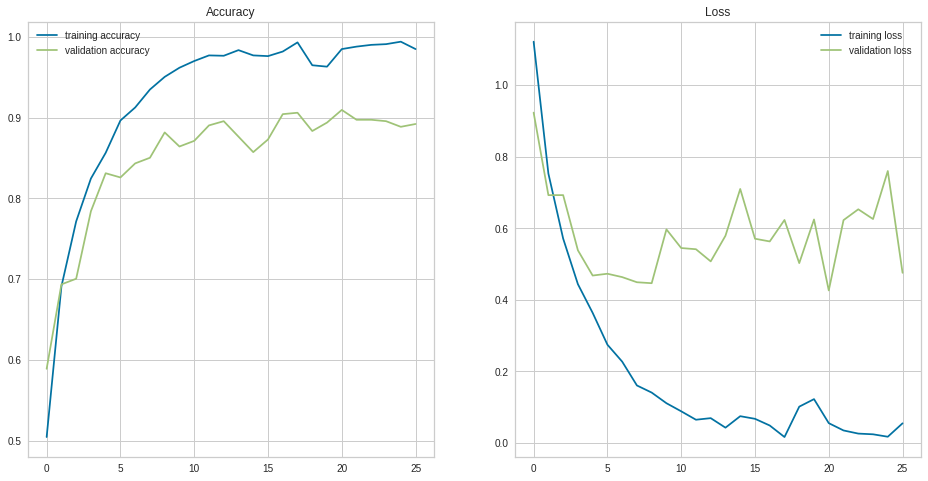

In [ ]:
plot_loss_accuracy_history(history4)

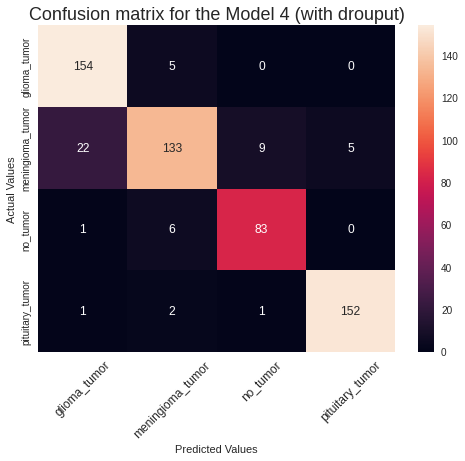

                  precision    recall  f1-score   support

    glioma_tumor       0.87      0.97      0.91       159
meningioma_tumor       0.91      0.79      0.84       169
        no_tumor       0.89      0.92      0.91        90
 pituitary_tumor       0.97      0.97      0.97       156

        accuracy                           0.91       574
       macro avg       0.91      0.91      0.91       574
    weighted avg       0.91      0.91      0.91       574

---- FINAL SCORE (CUSTOM FORMULA)  0.9027511721674604


In [ ]:
show_full_classification_report(model4, valid_ds, "Model 4 (with drouput)")

### Model with Class Weights

In [ ]:
model5 = Sequential([
  # layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[0], 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 512, 512, 16)      160       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 256, 256, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 64)      

In [ ]:
training_dist = get_distribution(train_ds)

total = np.sum(training_dist)

class_weight = {0: total / training_dist[0],  1: total / training_dist[1], 2: total / training_dist[2], 3: total / training_dist[3]}

class_weight

{0: 3.442278860569715,
 1: 3.5160796324655434,
 2: 7.527868852459016,
 3: 3.421758569299553}

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True,)
mc = ModelCheckpoint('regularized_model_drouput.h5', monitor='val_accuracy', mode='max')

set_seed()

max_epochs=30
history5 = model5.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=max_epochs,
  callbacks=[es, mc],
  class_weight=class_weight
)

Epoch 1/30
72/72 [==============================] - 32s 427ms/step - loss: 4.7687 - accuracy: 0.4569 - val_loss: 0.9930 - val_accuracy: 0.5801
Epoch 2/30
72/72 [==============================] - 30s 420ms/step - loss: 3.0597 - accuracy: 0.6773 - val_loss: 0.6882 - val_accuracy: 0.7178
Epoch 3/30
72/72 [==============================] - 30s 421ms/step - loss: 2.2517 - accuracy: 0.7670 - val_loss: 0.5884 - val_accuracy: 0.7578
Epoch 4/30
72/72 [==============================] - 30s 421ms/step - loss: 1.8037 - accuracy: 0.8214 - val_loss: 0.5324 - val_accuracy: 0.7962
Epoch 5/30
72/72 [==============================] - 30s 420ms/step - loss: 1.3682 - accuracy: 0.8641 - val_loss: 0.5338 - val_accuracy: 0.8014
Epoch 6/30
72/72 [==============================] - 30s 421ms/step - loss: 1.1197 - accuracy: 0.8841 - val_loss: 0.5116 - val_accuracy: 0.8031
Epoch 7/30
72/72 [==============================] - 30s 420ms/step - loss: 0.8994 - accuracy: 0.9077 - val_loss: 0.5453 - val_accuracy: 0.8066

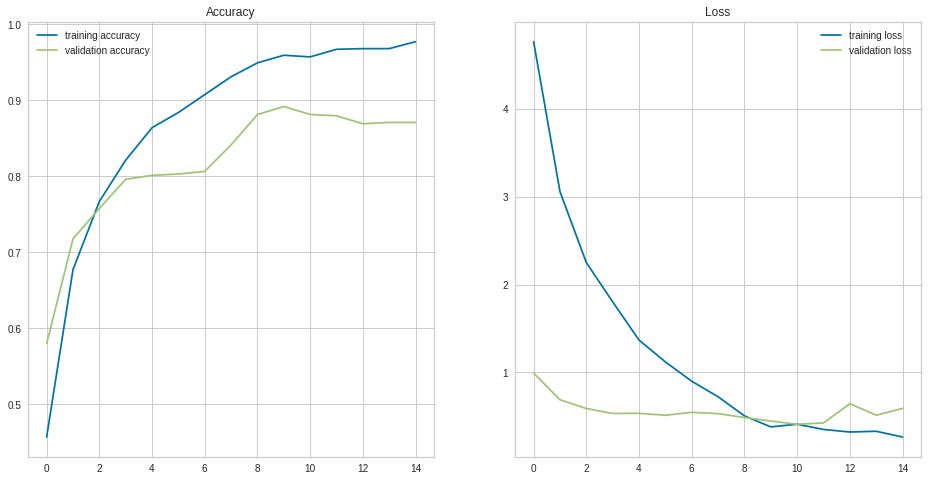

In [ ]:
plot_loss_accuracy_history(history5)

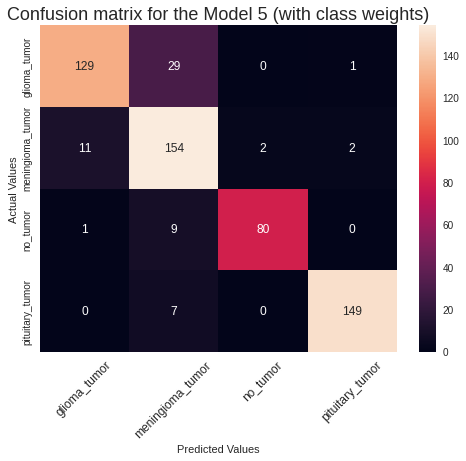

                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.81      0.86       159
meningioma_tumor       0.77      0.91      0.84       169
        no_tumor       0.98      0.89      0.93        90
 pituitary_tumor       0.98      0.96      0.97       156

        accuracy                           0.89       574
       macro avg       0.91      0.89      0.90       574
    weighted avg       0.90      0.89      0.89       574

---- FINAL SCORE (CUSTOM FORMULA)  0.9336274345843268


In [ ]:
show_full_classification_report(model5, valid_ds, "Model 5 (with class weights)")

### First Model with Data Augmentation

In [100]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(
      factor = (-0.027, 0.027), # 10 degrees
      fill_mode = 'constant'
  ),
  layers.RandomTranslation(
    height_factor = (-0.05, 0.05),
    width_factor = (-0.05, 0.05),
    fill_mode='constant',
  ),
  layers.RandomZoom(
    height_factor = (-0.05, 0.05),
    width_factor = (-0.05, 0.05),
    fill_mode='constant'
  )
])

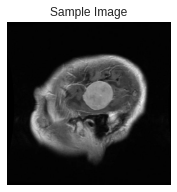

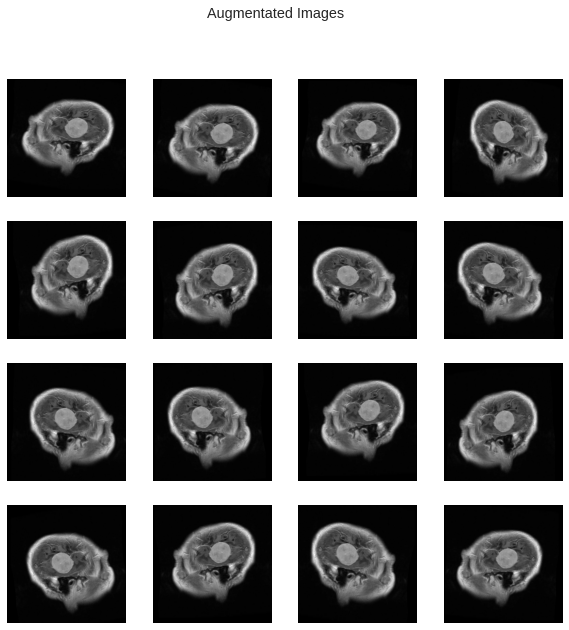

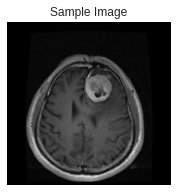

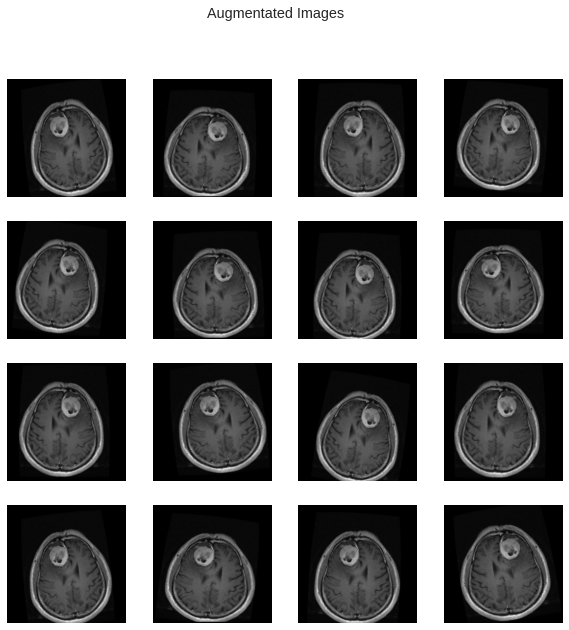

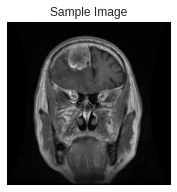

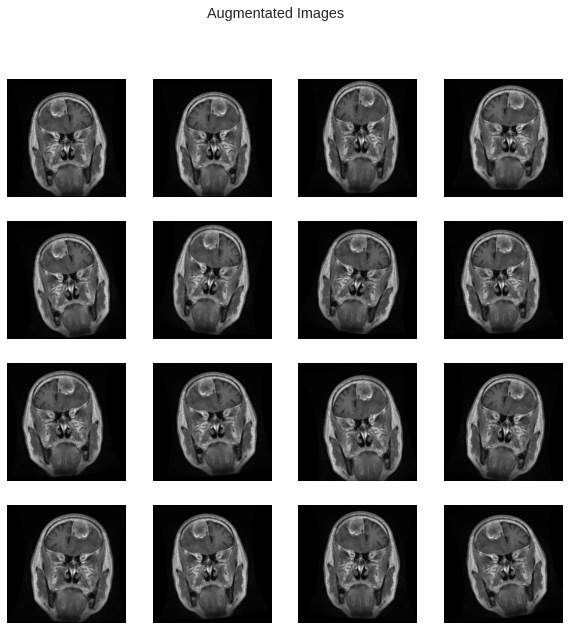

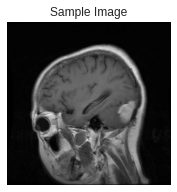

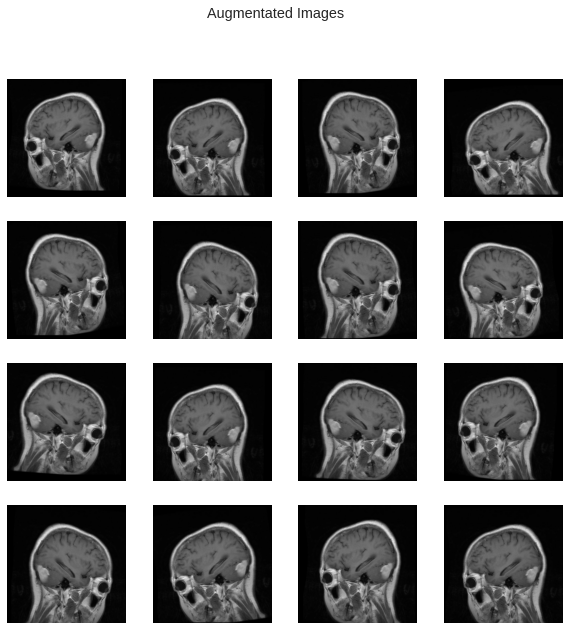

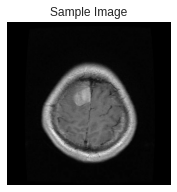

In [120]:
for index in range(5):
  ex = next(iter(train_ds.unbatch().map(lambda x, y: x).batch(1)))

  plt.figure(figsize=(3, 3))
  plt.title("Sample Image")
  plt.imshow(tf.squeeze(ex), cmap='gray')
  plt.axis('off')

  plt.figure(figsize=(10,10))
  plt.suptitle("Augmentated Images")
  for i in range(16):
      image = data_augmentation(ex, training=True)
      plt.subplot(4, 4, i+1)
      plt.imshow(tf.squeeze(image), cmap='gray')
      plt.axis('off')

  plt.show()

In [121]:
model6 = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes, activation=tf.nn.softmax)
])


model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model6.build(input_shape=(None, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))

model6.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 512, 512, 1)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 512, 512, 16)      160       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 256, 256, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 128, 128, 64)    

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, restore_best_weights=True)
mc = ModelCheckpoint('data_augmentation_model_tuned.h5', monitor='val_accuracy', mode='max')

set_seed()

training_dist = get_distribution(train_ds)
total = np.sum(training_dist)
class_weight = {0: total / training_dist[0],  1: total / training_dist[1], 2: total / training_dist[2], 3: total / training_dist[3]}
class_weight

max_epochs=100
history6 = model6.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=max_epochs,
  callbacks=[es, mc],
  class_weight = class_weight
)

Epoch 1/100
72/72 [==============================] - 63s 847ms/step - loss: 4.9445 - accuracy: 0.3798 - val_loss: 0.9721 - val_accuracy: 0.5976
Epoch 2/100
72/72 [==============================] - 61s 842ms/step - loss: 3.6761 - accuracy: 0.5801 - val_loss: 0.8310 - val_accuracy: 0.6254
Epoch 3/100
72/72 [==============================] - 60s 840ms/step - loss: 3.1296 - accuracy: 0.6302 - val_loss: 0.7561 - val_accuracy: 0.6864
Epoch 4/100
72/72 [==============================] - 60s 838ms/step - loss: 2.6965 - accuracy: 0.6834 - val_loss: 0.6512 - val_accuracy: 0.7003
Epoch 5/100
72/72 [==============================] - 61s 839ms/step - loss: 2.5690 - accuracy: 0.7160 - val_loss: 0.5983 - val_accuracy: 0.7143
Epoch 6/100
72/72 [==============================] - 60s 837ms/step - loss: 2.2631 - accuracy: 0.7391 - val_loss: 0.5720 - val_accuracy: 0.7439
Epoch 7/100
72/72 [==============================] - 60s 839ms/step - loss: 2.2011 - accuracy: 0.7378 - val_loss: 0.5181 - val_accuracy: